# U.S. Medical Insurance Costs

In this project, I will use data from the insurance.csv file, analyze it, clean it, and interpret it using Python. 
The data contains personal information about patients and their insurance costs. My goal is to understand it and see why insurance costs vary. 

Central question: 
Is being a female with children more costly than being a male with children? If so, what is the cost difference? Are there other factors that affect insurance costs? 

### Import
To start we have to import all the libraries that we may want to use for this project. Today, we will need the **CSV** library to bring in and use our data and the **Pandas**, **Matplotlib**, and **Seaborn** libraries to read and visualize our data. 

In [2]:
#importing the necessary libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#saveing the csv file to a variable and opening it so we can read it 
insurance_df = pd.read_csv('insurance.csv')

### Initial Inspection
Now it is time to get familiar with our data. Let's print out a sample table using the **.head()** function so that we can visualize all the columns and get a sense of the data that we are dealing with. We will also print out the total amount of columns and rows using the **.shape** function.

In [3]:
print(insurance_df.head())
print(insurance_df.shape)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
(1338, 7)


##### What does the data contain:
- The data details the individual medical insurance costs in the US. It is organized using a table with  **7 rows** (age, sex, bmi, children, smoker, region, charges) and **1338 columns** which represent each individual.
- At a first glance we can tell that the variable types in the columns vary (respecting the column order): discrete, nominal, continuous, discrete, binary, nominal, and continuous. Let's double check below.
- There are no missing values in our sample data, but this is only 5 rows out of 1338, so we will have to check. 



#### Validate Data
Let's make sure that our assumptions from the sample data were correct: 
- We'll use the **.info()** method to see the variable types and if there are any missing values.
- To double check we're going to print a quick True/False answer using the **.insull().values.any()** method.
- Note: if you only wanted to print out the variable types of the data we could use the **.dtypes** function.

In [32]:
print(insurance_df.info())
print(insurance_df.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None
False


Great! It appears our variable types were correct and there are also NO missing values!
#### Clean Data
Now let's clean the data up. 
- First, let's check for duplicates by using **.duplicated().sum()** and printing that out.

In [5]:
#Checking for duplicates
print(insurance_df.duplicated().sum()) 

1


It looks like there is one duplicate. To get rid of it we can use the **.drop_duplicates()** function. This will allow for a cleaner dataset.
Note: this will change the value of the DataFrame from 1338 columns to **1337 columns**.

In [6]:
insurance_df = insurance_df.drop_duplicates()

##### Categorical columns: 
- Let's check for inconsistent categories (for categorical columns).

In [7]:
#Checking for inconsistencies in the categorical columns
print(insurance_df["sex"].unique())  
print(insurance_df["smoker"].unique())  
print(insurance_df["region"].unique()) 

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


Looks like everything is in order now! No more duplicates and no inconsistencies. 

##### Numerical columns: 
- Let's look at the numerical column stats to understand the distribution, spread, and presence of potential outliers in the data.

In [8]:
print(insurance_df.describe())

               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


What we can tell:
- **Age:** The average age is 39.22. The mean age (39.22) and the median age (39) are very similar which tells us that the distribution is evenly spread. The standard deviation is 14.04 which also tells us that the ages are spread over a wide rage. The age rage is from 18 to 64. 
- **BMI:** The average bmi is 30.66, which is described by the [NHS](https://www.nhs.uk/conditions/obesity/) as the obese range. The mean bmi (30.66) and the median bmi (30.4) tells us that the distribution is evenly spread. The standard deviation is 6.1, making the value vary moderatley. What we can see is the max (53.13) is much higher than the the 75% quartile number, indicating a strong chance of an outliar.
  -  To see we will use the Upper Bound = Q3 + 1.5 × IQR(Q3 - Q1) equation. 34.7 + 1.5 x 8.41 = 47.32.
  -  53.13> 47.32, meaning there is an outlier.
- **Children:** The average amount of children is 1.1. The mean (1.1) and the median (1) are practically the same making it evenly distributed. The max (5) is higher than the Q3 (2) which means that the distribution will be skewed toward people with fewer children.
- **Charges:** The average insurance cost is $13279.12. The median ( 9386.16) is much lower than the mean (13279.12), indicating a right skewed distribution. Also, the standard deviation (12110.6) is really high, making the data extremley spread out. The max (63770.43) charge is super high, meaning there are outliers.
  - so we will want to check using Upper Bound. 16657.72 + (1.5 x (16657.72 - 4746.34)) = 34524.79.
  - 63770.43 > 34524.79, meaning there is an extreme outlier.

#### Visualization: 
It's useful to visualize the information so we can see it all laid out infront of us. So, let's creat some visuals in order to find the answers to our initial question: 
- Is being a female with children more costly than being a male with children?

Lets start with a view of the general insurance cost for female and for male. To do this lets call the seaborn library and create a boxplot to comapre both costs. We will name this graph "Insurance Cost by Gender".

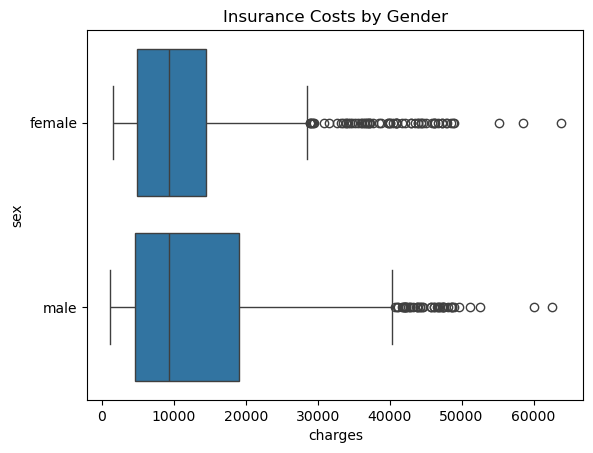

In [9]:
sns.boxplot(x='charges', y='sex', data =insurance_df)
plt.title('Insurance Costs by Gender')
plt.show()

##### Interpretation of "Insurance Cost by Gender":
- Median cost for female and male is very similar around $10,000.
- The male costs varies more than female insurance costs.
- There are outliers for both genders. This is likely due to the increase of insurance cost for smokers or high BMIs.

#### Visualization: 
Next, lets visualize the costs of male and female with children. To do this we will have to filter our data so that only candidates with children are displayed. First, we will create a new DataFrame that includes insurance payers with children.

In [10]:
parents_df = insurance_df[insurance_df["children"] > 0]

We will now create a new boxplot using Seaborn that displays the information. 

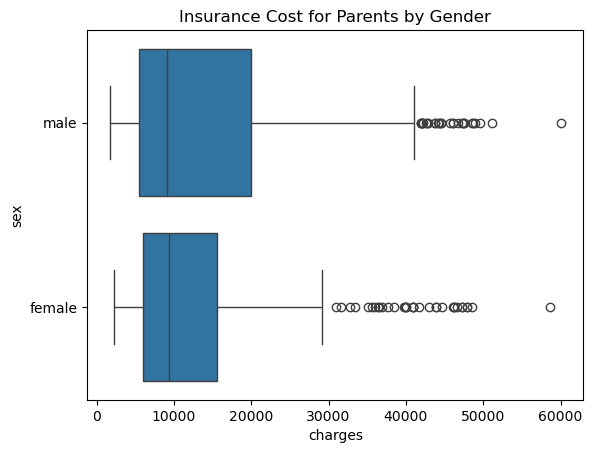

In [11]:
sns.boxplot(x='charges', y='sex', data=parents_df)
plt.title('Insurance Cost for Parents by Gender')
plt.show()

##### Interpretation of "Insurance Cost for Parents by Gender":
- The median is very similar for both sexs.
- They both contain outliers.
- The male boxplot has more variation in price...
What this tells us is that there is other information about the patients that causes the price differences. Let's uncover what it may be.

#### Visualization: 
Let's create a boxplot to understand the different costs of patients based on BMI.

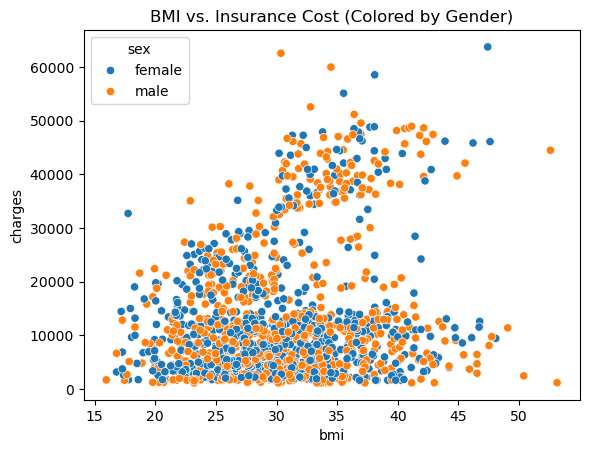

In [30]:
sns.scatterplot(x="bmi", y="charges", hue="sex",data=insurance_df)
plt.title("BMI vs. Insurance Cost (Colored by Gender)")
plt.show()

##### Interpretation of "BMI vs Insurance Cost (Colored by Gender)":
- There is an ever so slight positive correlation between a high BMI and an increased insurance cost, but not enough to actually demostrate anything of note.

This visualization tells us that BMI most likley will not increase your insurance cost. 

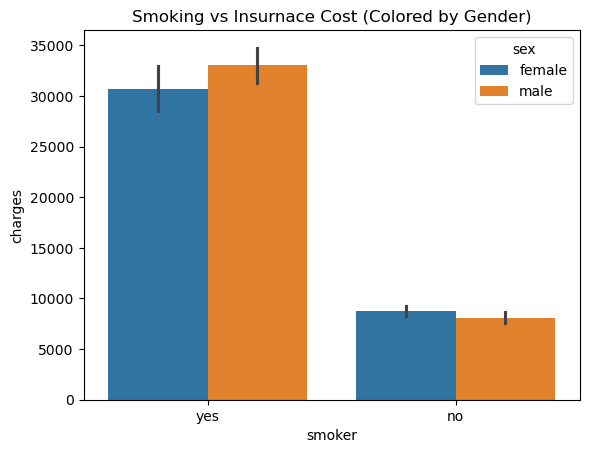

In [31]:
sns.barplot(x='smoker', y='charges', hue='sex', data=insurance_df)
plt.title('Smoking vs Insurnace Cost (Colored by Gender)')
plt.show()

##### Interpretation of "Smoking vs Insurnace Cost (Colored by Gender)":
- There is an apparent increase, around $20,000, in insurance cost for smokers compared to non-smokers.
- There is only a slight difference in insurance cost for male and female smokers. This suggests that the slightly higher insurance cost for male smokers may be affected by other factors.

This tells us that insurance costs will be much higher if you are a smoker, no matter your gender. 

#### Insights
- Do women with children actually pay more than men with children?
  - No. There is no statistical evidence proving that there is a difference in insurance cost based on women with children vs men with children.

- Are there bigger cost differences based on smoking or BMI instead?
  - Yes. Smoking greatly increases your insurance cost. BMI may have an impact but there is no strong correlation indicating an increase in insurance cost.

- Which factor (sex, smoking, BMI, region) has the largest impact?
  - Smoking. Smokers, whether male or female, insurance costs increases by over $20,000.

Safe to say - DO NOT SMOKE! Smoking is dangerous, as it causes severe health problems, with 'more than 16 million Americans living with a disease caused by smoking' ([CDC](https://www.cdc.gov/tobacco/about/index.html)). 